### Create csv files with unique labelled ROIs per sample

In [1]:
import os
import glob
import numpy as np
import pandas as pd
from collections import defaultdict
import zarr
import tifffile as tiff
import matplotlib.pyplot as plt



### Check PanCK presence in each labelled ROI

['S098_iOme_labelled_rois.csv', 'S083_iOme2_labelled_rois.csv', 'S130_iOme_labelled_rois.csv', 'S069_iAdnL_labelled_rois.csv', 'S107_iOme_labelled_rois.csv', 'S121_iOme_labelled_rois.csv', 'S069_pOme_labelled_rois.csv', 'S100_iOme_labelled_rois.csv', 'S131_iOme_labelled_rois.csv', 'S188_iOme_labelled_rois.csv', 'S197_iOme_labelled_rois.csv', 'S268_iOme_labelled_rois.csv', 'S333_pOme_labelled_rois.csv', 'S333_iOvaR_labelled_rois.csv']
   Channel_name
0        DAPI_1
1         CD4_1
2       PanCK_2
3       HLA-A_1
4    Vimentin_1
5        DAPI_2
6        Iba1_1
7         CD11c
8          CD8a
9        DAPI_3
10      CD163_1
11     HLA-DPB1
12      NKG2a_1
['9_S098_iOme_2_1_down.ome.tiff', '9_S083_iOme2_2_1_down.ome.tiff', '9_S130_iOme_2_1_up.ome.tiff', '9_S069_iAdnL_2_1_down.ome.tiff', '9_S107_iOme_2_1_up.ome.tiff', '9_S121_iOme_2_1_down.ome.tiff', '9_S069_pOme_2_1_down.ome.tiff', '9_S100_iOme_2_1_up.ome.tiff', '9_S131_iOme_2_1_down.ome.tiff', '9_S188_iOme_2_1_up.ome.tiff', '9_S197_iOme_

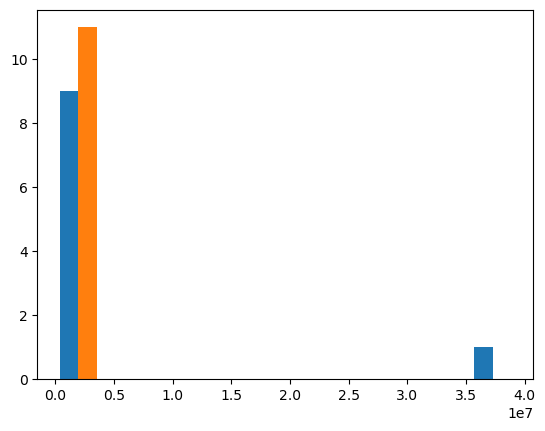

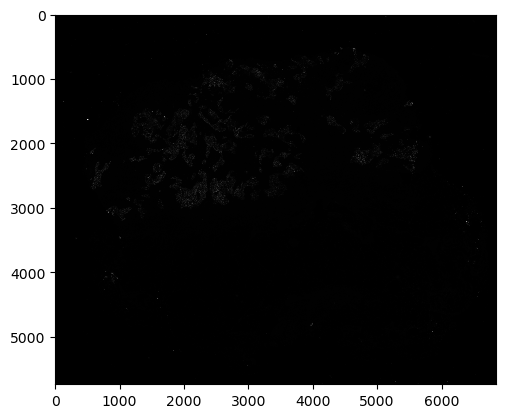

Set threshold is 966.0
    ROI Index  Start X  End X  Start Y  End Y  Width  Height  \
0           1     7824   9416    10472  12064   1592    1592   
1           2     9912  10616    10992  11600    704     608   
2           3    10496  10984    10744  11160    488     416   
3           4    18848  19208     8392   8952    360     560   
4           3    15144  15816     7352   7776    672     424   
5           4     9760  10240     9152   9704    480     552   
6           5    13088  13768    10448  11336    680     888   
7           7    13992  14616     7072   7424    624     352   
8           5    19600  20096     8608   9064    496     456   
9           4    11544  12016     5600   6056    472     456   
10          3     7624   8376     6848   8400    752    1552   
11          8    10056  10568     5096   5696    512     600   
12          6     7456   8032     6248   6728    576     480   
13          3    15344  15912     2808   3480    568     672   
14          4    

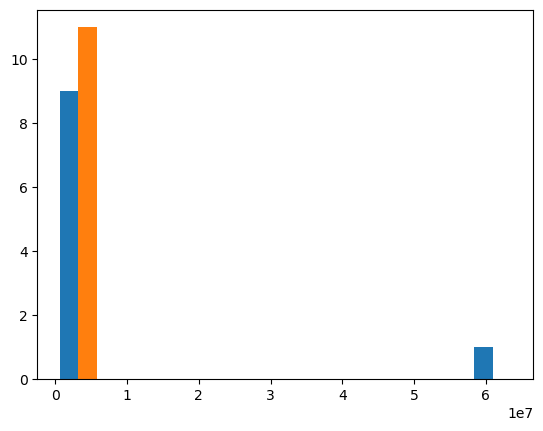

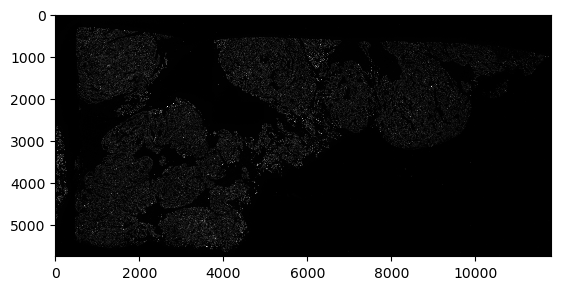

Set threshold is 6855.0
    ROI Index  Start X  End X  Start Y  End Y  Width  Height  \
0           1    21352  21800    13720  14112    448     392   
1           2    13720  14008    19488  19928    288     440   
2           3    26640  26968    11392  11768    328     376   
3           1    15576  15768    19608  19848    192     240   
4           1     1808   2112    13976  14664    304     688   
5           1    16552  16784    21136  21368    232     232   
6           4    44896  45312     5336   5632    416     296   
7           1     3240   3464    17488  17720    224     232   
8           2     2208   2464    21392  21640    256     248   
9           1    12728  13192    19432  19928    464     496   
10          2    25424  26200    12104  13096    776     992   
11          3    23872  24480    12048  13016    608     968   
12          4    20352  21416    12896  13440   1064     544   
13          5    24808  25544     9560  10224    736     664   
14          1   

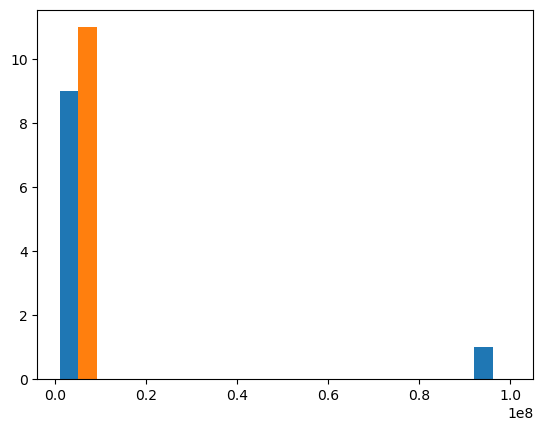

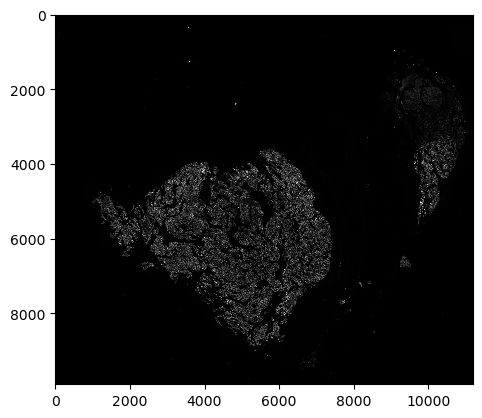

Set threshold is 11825.0
    ROI Index  Start X  End X  Start Y  End Y  Width  Height  \
0           1    12712  15728    16560  18344   3016    1784   
1           2    18088  18872    17296  18424    784    1128   
2           3    20976  21792    17040  17912    816     872   
3           4    20088  20712    17312  18216    624     904   
4           5    10656  11640    25432  25944    984     512   
5           6    19008  19576    16960  17704    568     744   
6           7    27688  28216    21144  21872    528     728   
7           8    24192  24808    15912  16520    616     608   
8           9    22824  23560    16232  16728    736     496   
9          10    23224  23856    17248  17816    632     568   
10          2    10288  11744    21176  22656   1456    1480   
11          3     4976   6336    19440  20664   1360    1224   
12          6    12952  13912    18912  19944    960    1032   
13          8    11224  12176    19768  20496    952     728   
14          9  

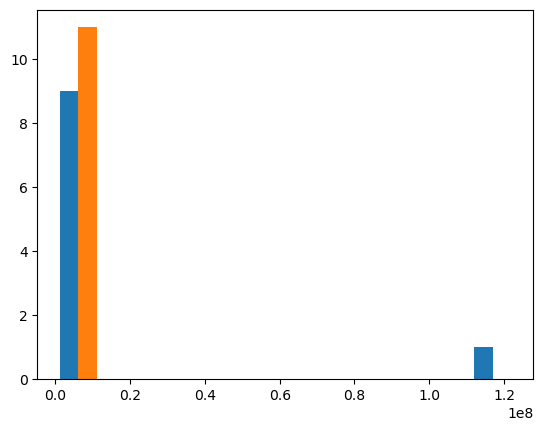

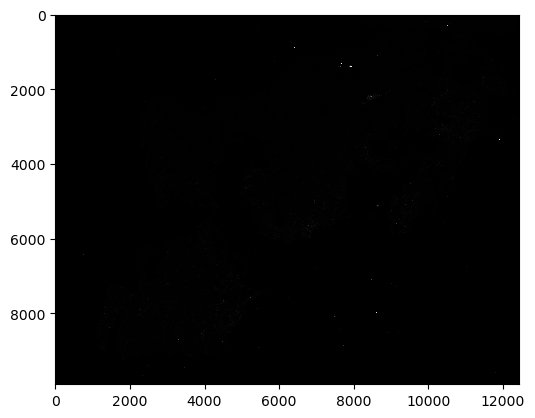

Set threshold is 487.0
    ROI Index  Start X  End X  Start Y  End Y  Width  Height  \
0           1    27904  28976    14888  15648   1072     760   
1           2    23280  23912    15448  16712    632    1264   
2           3    26032  26848    21304  22168    816     864   
3           4    25728  26752    13288  13920   1024     632   
4           5    29064  29568    11280  12360    504    1080   
5           6    25624  26208    22944  23800    584     856   
6           7    21192  21952    16800  17304    760     504   
7           8    23624  24376    10816  11312    752     496   
8           9    27704  28448    12968  13432    744     464   
9          10    30312  30792    11016  11608    480     592   
10          7    22728  23560    17280  17856    832     576   
11          8    27912  28384    21520  22352    472     832   
12          7    30456  30968    15024  15832    512     808   
13          2    32816  34512     8552   9808   1696    1256   
14          3    

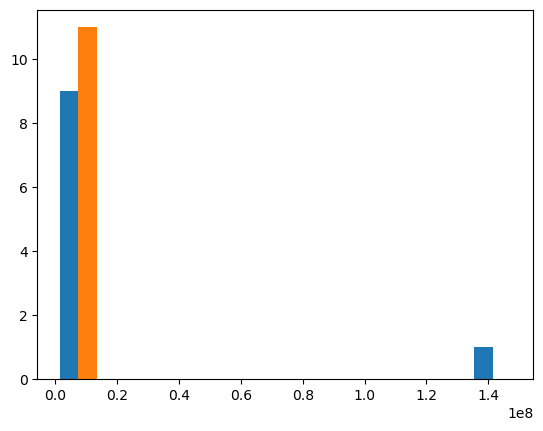

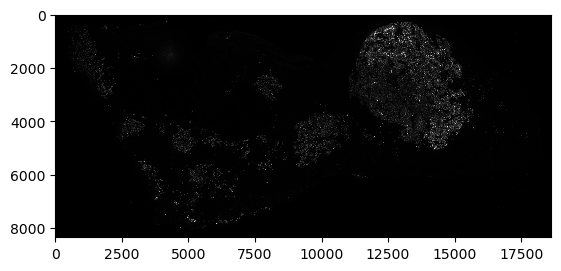

Set threshold is 5830.0
    ROI Index  Start X  End X  Start Y  End Y  Width  Height  \
0           1    13328  13808     3432   4064    480     632   
1           2    29176  29592     4312   4776    416     464   
2           1    25016  25712    27968  28784    696     816   
3           2    15344  15824    26432  27152    480     720   
4           3     8520   9248     5224   5664    728     440   
5           1    33416  34184     8240   9248    768    1008   
6           3    27560  28152     9008   9608    592     600   
7           5    21160  21672    13192  13608    512     416   
8           6    28248  28616     9336   9904    368     568   
9           3    22424  22896    29696  30240    472     544   
10          5    22536  22904    29136  29384    368     248   
11          1    16408  17424    17088  18152   1016    1064   
12          9    43928  44576    15352  15752    648     400   
13         10     8064   8792    12936  13280    728     344   
14          1   

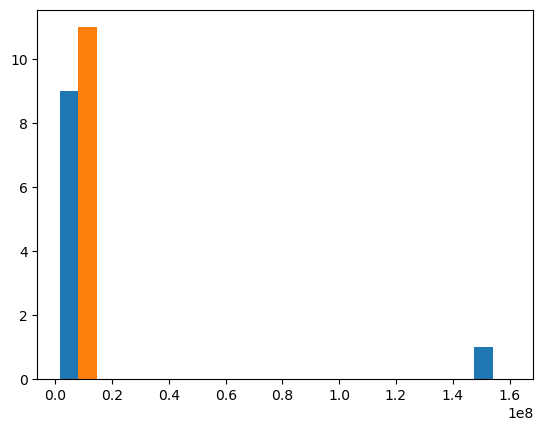

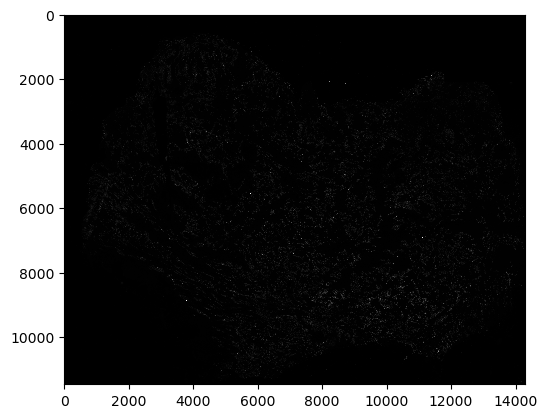

Set threshold is 2988.0
    ROI Index  Start X  End X  Start Y  End Y  Width  Height  \
0           1     3776   4248    24544  25064    472     520   
1           2     3232   3752    29624  29976    520     352   
2           3     3592   4016    22632  23000    424     368   
3           4    13240  13600    11224  11456    360     232   
4           1     9688  10264    31632  32104    576     472   
5           4     8528   8992    17536  17880    464     344   
6           6    47752  48064    34192  34552    312     360   
7           3    15400  15800    13064  13616    400     552   
8           6     2672   3160    28248  28512    488     264   
9           3     4200   4744    20840  22064    544    1224   
10          4     4344   4984    22936  23880    640     944   
11          6    52120  52416    35424  35792    296     368   
12          7    15864  16200    27088  27408    336     320   
13          1     2944   3600    24304  25200    656     896   
14          2   

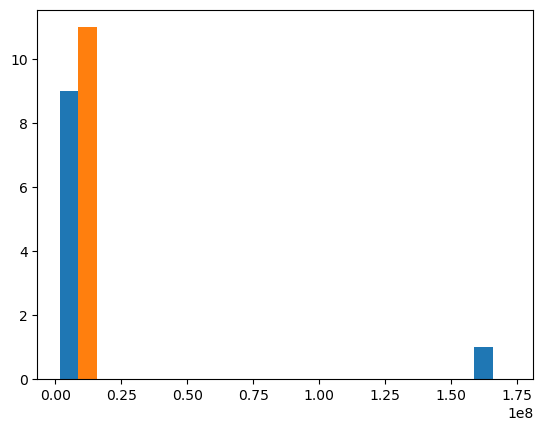

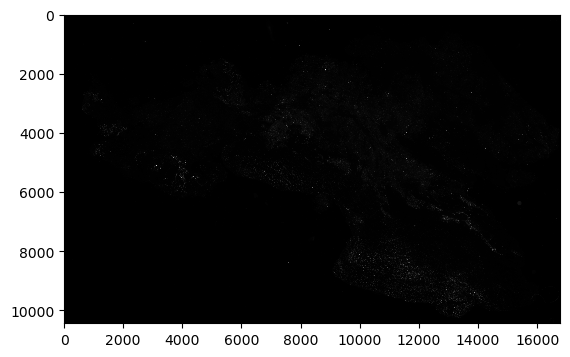

Set threshold is 1772.0
    ROI Index  Start X  End X  Start Y  End Y  Width  Height  \
0           1     2504   3680    10840  12896   1176    2056   
1           2    23664  24264    20256  20728    600     472   
2           3    21168  21512    18744  19208    344     464   
3           4    61384  61712    34360  34664    328     304   
4           3    45536  46200    38192  38664    664     472   
5           5     3128   3648    13168  13568    520     400   
6           1    39776  42336    19832  24016   2560    4184   
7           2    37248  39256    19472  22136   2008    2664   
8           3    20064  22392    10528  12296   2328    1768   
9           5    35016  36640     6384   7696   1624    1312   
10          6    43064  44616    26968  28280   1552    1312   
11          7    35552  37184    19560  20704   1632    1144   
12          8    20720  22176     6544   7472   1456     928   
13          9    42696  43752    26088  27224   1056    1136   
14         10   

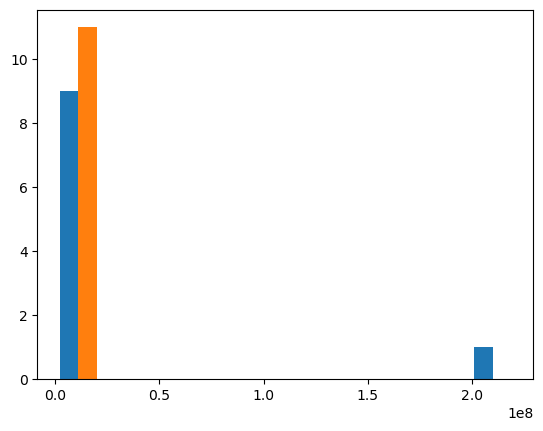

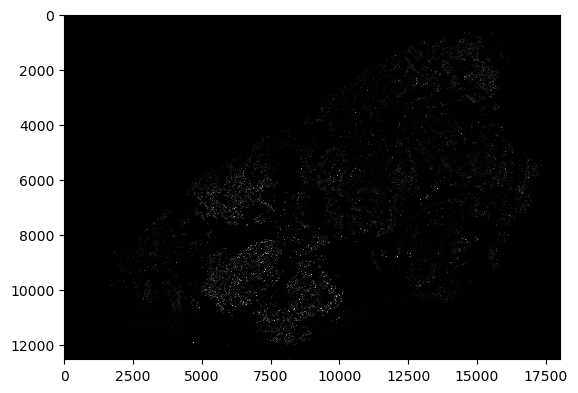

Set threshold is 2928.0
    ROI Index  Start X  End X  Start Y  End Y  Width  Height  \
0           1    38000  38552    42168  42864    552     696   
1           2    38768  39072    23584  24360    304     776   
2           3    62440  63024    35864  36216    584     352   
3           4    38664  39072    19488  19928    408     440   
4           5    62304  62720    36608  37000    416     392   
..        ...      ...    ...      ...    ...    ...     ...   
57          8    50616  51808    31320  32488   1192    1168   
58          3    57664  58872     3504   5376   1208    1872   
59          6    48872  50416    25128  26056   1544     928   
60          2    35888  37128    42680  43520   1240     840   
61          9    43704  44184    13120  13808    480     688   

                              Label  PanCK_positive  
0   CD4_1_CD8a_Iba1_1_CD11c_NKG2a_1            True  
1   CD4_1_CD8a_Iba1_1_CD11c_NKG2a_1            True  
2   CD4_1_CD8a_Iba1_1_CD11c_NKG2a_1          

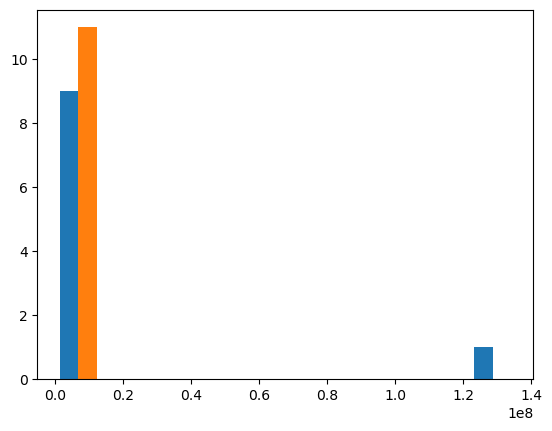

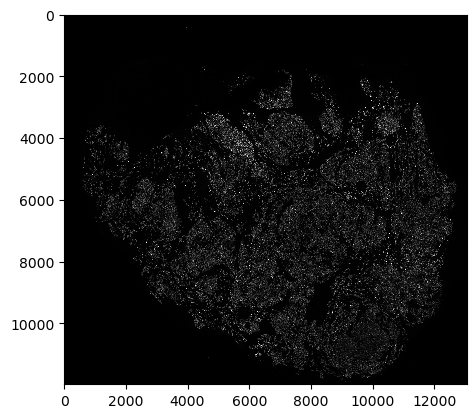

Set threshold is 14062.0
    ROI Index  Start X  End X  Start Y  End Y  Width  Height  \
0           1    42712  43232    25152  25648    520     496   
1           2    38472  38952    44448  44848    480     400   
2           3    38912  39352    39616  40048    440     432   
3           4    43568  43984    28600  28952    416     352   
4           5    48792  49112    26112  26400    320     288   
5           6    47896  48192    29976  30272    296     296   
6           7    46408  46704    33408  33688    296     280   
7           4    38456  38912    38952  39328    456     376   
8           1    40648  41496    19568  20744    848    1176   
9           3    20880  21672    29800  30592    792     792   
10          4    15560  16360    31984  32656    800     672   
11          5    38216  38856    25448  26216    640     768   
12          6    43096  43864    27576  28184    768     608   
13          7    33232  33936    23224  23752    704     528   
14          8  

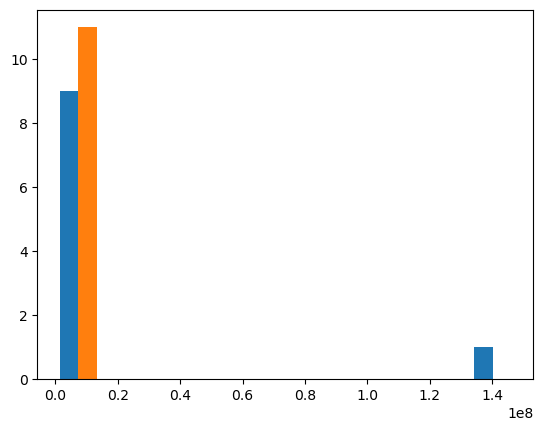

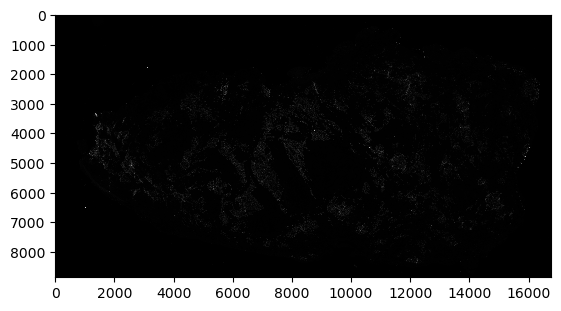

Set threshold is 2474.0
    ROI Index  Start X  End X  Start Y  End Y  Width  Height  \
0           1     4336   6640    18728  20176   2304    1448   
1           2     7432   8936    17144  19344   1504    2200   
2           3     8608  10000    19464  21584   1392    2120   
3           4    13008  14768    22872  24424   1760    1552   
4           5     5040   6120    16832  18840   1080    2008   
5           6    47328  48216     8816  10992    888    2176   
6           7    28184  29408    21024  22536   1224    1512   
7           8     6680   7480    14832  16424    800    1592   
8           9    45392  46328    19080  20056    936     976   
9          10    10008  10832    19912  20920    824    1008   
10          3    10856  12712    20888  22592   1856    1704   
11          8    29480  30288    21248  22616    808    1368   
12          9    10400  11192    23304  24592    792    1288   
13         10    26736  27712    19264  20264    976    1000   
14          5   

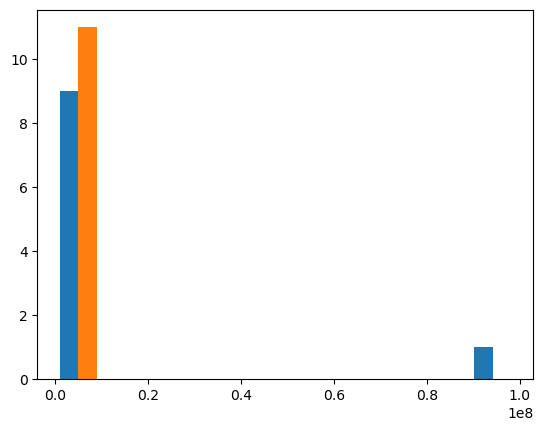

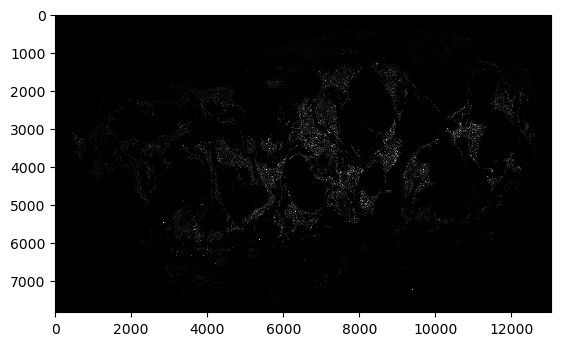

Set threshold is 4243.0
    ROI Index  Start X  End X  Start Y  End Y  Width  Height  \
0           1    32320  33024    24312  24968    704     656   
1           2    41232  41736     3488   4128    504     640   
2           3    35728  36232    24520  25096    504     576   
3           4    36904  37336    21368  21984    432     616   
4           5    26232  26696    15144  15600    464     456   
..        ...      ...    ...      ...    ...    ...     ...   
60          4    38344  40160     1488   2760   1816    1272   
61          7    49760  50680     6088   8200    920    2112   
62         10    49336  49968    11272  11912    632     640   
63          6    15624  16264    19976  20920    640     944   
64         10     5616   6448     8712   9208    832     496   

                              Label  PanCK_positive  
0   CD4_1_CD8a_Iba1_1_CD11c_NKG2a_1            True  
1   CD4_1_CD8a_Iba1_1_CD11c_NKG2a_1            True  
2   CD4_1_CD8a_Iba1_1_CD11c_NKG2a_1          

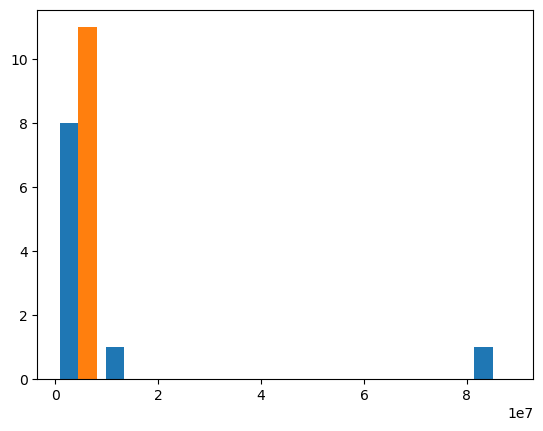

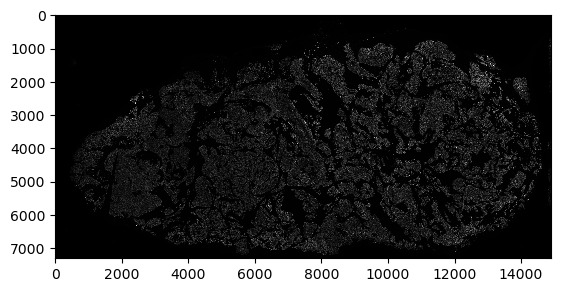

Set threshold is 12955.0
    ROI Index  Start X  End X  Start Y  End Y  Width  Height  \
0           1    16872  17176     6984   7248    304     264   
1           1     4232   4672    15944  16280    440     336   
2           2    38224  38632     4952   5192    408     240   
3           2    58248  58480    16232  16464    232     232   
4           1    59152  59528    15304  16040    376     736   
5           2    25248  25688    27464  27808    440     344   
6           4    28704  29024    15448  15760    320     312   
7           2    43280  43616     6824   7160    336     336   
8           2    15520  15792     8936   9192    272     256   
9           5    47056  47480    26824  27144    424     320   
10          1    33728  34904    25048  26376   1176    1328   
11          2    48816  50008    18040  19080   1192    1040   
12          3    44072  44976    21072  22024    904     952   
13          4    38808  39752    16008  16504    944     496   
14          5  

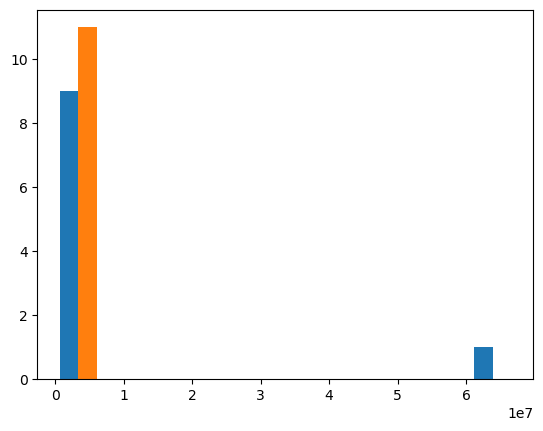

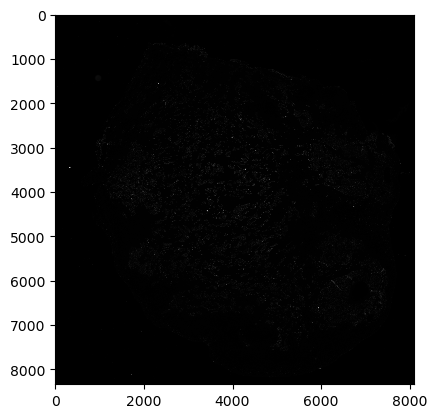

Set threshold is 1857.0
    ROI Index  Start X  End X  Start Y  End Y  Width  Height  \
0           1    27592  28032    11440  12216    440     776   
1           2    28480  29176    24824  25192    696     368   
2           1    25016  25600    24064  24704    584     640   
3           4     8088   8640    12912  13400    552     488   
4           2    16656  17144     9848  10488    488     640   
5           3    26408  26944    23584  24088    536     504   
6           1    11648  12480    23808  24600    832     792   
7           2    26624  27536    15360  16072    912     712   
8           4    12768  13400     2896   3360    632     464   
9           6    28440  28928    10584  11032    488     448   
10          4    22152  22488     5720   6336    336     616   
11          3    16336  16968    17280  17880    632     600   
12          5    22848  23336    26288  27088    488     800   
13          9     8992   9544    13264  13648    552     384   
14          6   

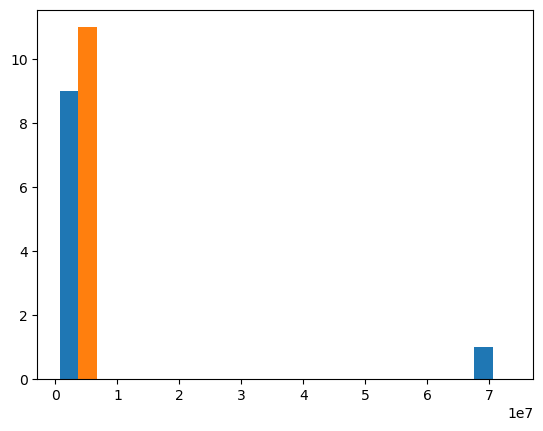

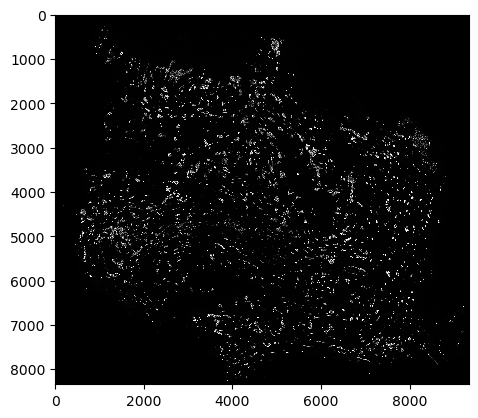

Set threshold is 4355.0
    ROI Index  Start X  End X  Start Y  End Y  Width  Height  \
0           1    18912  19672    19992  20632    760     640   
1           2    10648  11336     5264   5920    688     656   
2           3     3696   4352     2448   3048    656     600   
3           4    15680  16416    18848  19368    736     520   
4           5    10680  11552    19280  19688    872     408   
5           6    16072  16408    19304  19752    336     448   
6           6    20976  21536    19440  19952    560     512   
7           7    20088  20520    19192  19720    432     528   
8           6    33104  33568    11432  11944    464     512   
9           2    30656  31512    10544  11208    856     664   
10          7    16016  16688     6288   6816    672     528   
11          8    11688  12312     4888   5416    624     528   
12          9     5064   5712    19192  19672    648     480   
13         10    16592  17048    19200  19688    456     488   
14          4   

In [6]:
def create_binary_mask_for_channel(wsi_image, channel_name, channel, percentile):
    """
    Function to create binary matrix based on thresholded channel image.
    Inputs:
        - wsi_image - whole slide image 
        - channel - channel of interest
        - percentile - percentile as a threshold to create final binary image
    Output:
        - binary image
    """

    Channel_wsi_image = wsi_image[channel,:,:]
    print(f"Shape of selected {channel_name} image:{Channel_wsi_image.shape}")

    # Find the minimum value and its position
    min_value = np.min(Channel_wsi_image)
    min_position = np.unravel_index(np.argmin(Channel_wsi_image), Channel_wsi_image.shape)

    # Find the maximum value and its position
    max_value = np.max(Channel_wsi_image)
    max_position = np.unravel_index(np.argmax(Channel_wsi_image), Channel_wsi_image.shape)

    print(f"Minimum value is {min_value} at {min_position}")
    print(f"Maximum value is {max_value} at {max_position}")

    plt.hist(np.histogram(Channel_wsi_image))
    plt.show()
    plt.imshow(Channel_wsi_image,cmap='gray',interpolation='none')
    plt.show()

    # Calculate the threshold based on the percentile
    threshold = np.percentile(Channel_wsi_image, percentile)
    print(f"Set threshold is {threshold}")

    return(Channel_wsi_image > threshold.astype(np.uint16))

# Set working directory to the location of ROIs files
os.chdir("E:/Project_9_EyeMTbatch2/ROIs/labelled_ROIs_z3_percentile90/")

# Get all TIFF files in the directory
rois_files = glob.glob("*.csv")

if not rois_files:
    print("No ROI files found in the directory.")

print(rois_files)

# Set working directory to the location of TIFF files
os.chdir("E:/Project_9_EyeMTbatch2/stiched/")

# Load channels file
channels_file = "E:/Project_9_EyeMTbatch2/channels.csv"
channels = pd.read_csv(channels_file)
print(channels)

# Get all TIFF files in the directory
tiff_files = glob.glob("*.tiff")

if not tiff_files:
    print("No TIFF files found in the directory.")

print(tiff_files)

for filename in rois_files:

    split_string = filename.split('_')

    # Define sample and color for labels
    sample = '_'.join([split_string[0], split_string[1]])
    print(sample)

    tiff_file = [file for file in tiff_files if sample in file][0]
    
    # Open TIFF file
    with tiff.TiffFile(tiff_file, is_ome=False) as image:
        z = zarr.open(image.series[0].aszarr(), mode='r')
        wsi_image = z[2]
        
        # Get the channel index for the given marker
        channel_index = np.where(channels['Channel_name'] == 'PanCK_2')[0][0]
        print(f"PanCK_2 is at {channel_index} in file {tiff_file}")

        # Create binary mask for PanCK
        matrix = create_binary_mask_for_channel(
            wsi_image=wsi_image, channel_name='PanCK_2', channel=channel_index, percentile=95
        )
    
    # Read csv file
    roi_data = pd.read_csv(f'E:/Project_9_EyeMTbatch2/ROIs/labelled_ROIs_z3_percentile90/{filename}')
    
    # Adding a new column to mark PanCK positivity
    roi_data['PanCK_positive'] = False

    for index, roi in roi_data.iterrows():
        start_x, start_y, end_x, end_y = int(roi['Start X']/4), int(roi['Start Y']/4), int(roi['End X']/4), int(roi['End Y']/4)
        roi_image = matrix[start_y:end_y, start_x:end_x]

        if np.any(roi_image):  # Check if any pixel in ROI is positive for PanCK
            roi_data.at[index, 'PanCK_positive'] = True
    
    print(roi_data)
    roi_data.to_csv(f'E:/Project_9_EyeMTbatch2/ROIs/PanCK_labelled_ROIs_z3_percentile90/{filename}', index=False)

['S121_iOme.ome.tiff', 'S073_iOme1.ome.tiff', 'S130_iOme.ome.tiff', 'S268_iOme.ome.tiff', 'S118_iOme.ome.tiff', 'S107_iOme.ome.tiff', 'S072_iOme.ome.tiff', 'S112_iOme.ome.tiff', 'S050_iAdn.ome.tiff', 'S197_iOme.ome.tiff', 'S113_iOme.ome.tiff', 'S100_iOme.ome.tiff', 'S131_iOme.ome.tiff', 'S083_iOme1.ome.tiff', 'S065_iOme.ome.tiff', 'S084_iOme2.ome.tiff', 'S110_iTubR.ome.tiff', 'S091_iOme1.ome.tiff', 'S188_iOme.ome.tiff', 'S123_iOme.ome.tiff', 'S098_iOme.ome.tiff', 'S005_iOme.ome.tiff', 'S057_iOme.ome.tiff', 'S081_iOme.ome.tiff']
S121_iOme.ome.tiff
PanCK_2 is at 2 in file S121_iOme.ome.tiff
Shape of selected PanCK_2 image:(10524, 16830)
Minimum value is 0 at (0, 0)
Maximum value is 65535 at (2751, 16402)


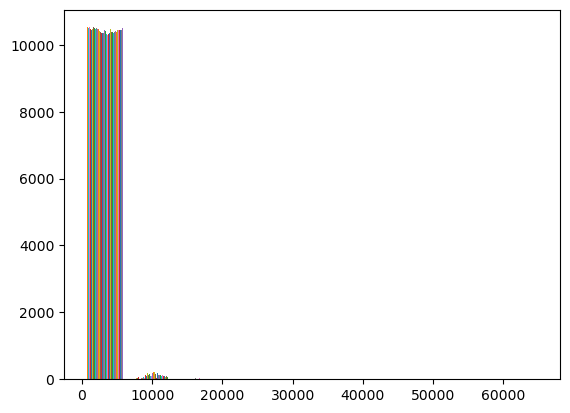

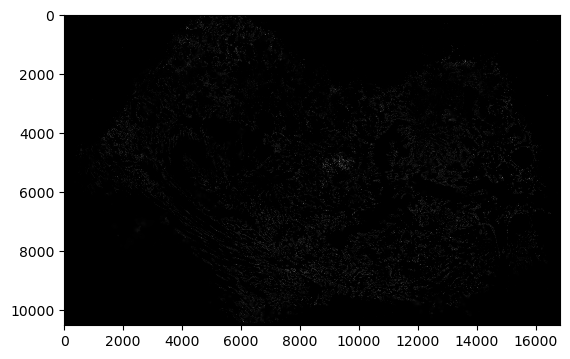

Set threshold is 3328.0
S073_iOme1.ome.tiff
PanCK_2 is at 2 in file S073_iOme1.ome.tiff
Shape of selected PanCK_2 image:(5298, 12462)
Minimum value is 0 at (0, 0)
Maximum value is 65535 at (1862, 4455)


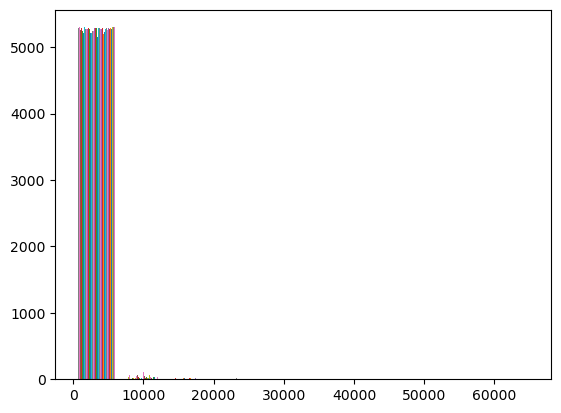

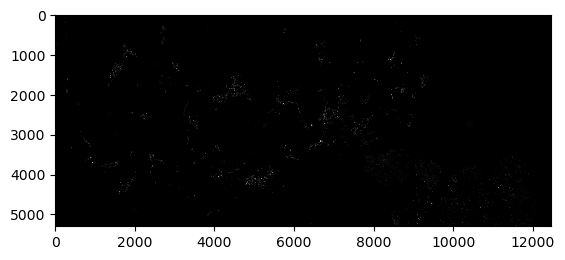

Set threshold is 385.0
S130_iOme.ome.tiff
PanCK_2 is at 2 in file S130_iOme.ome.tiff
Shape of selected PanCK_2 image:(5255, 6257)
Minimum value is 0 at (0, 0)
Maximum value is 65535 at (2902, 6049)


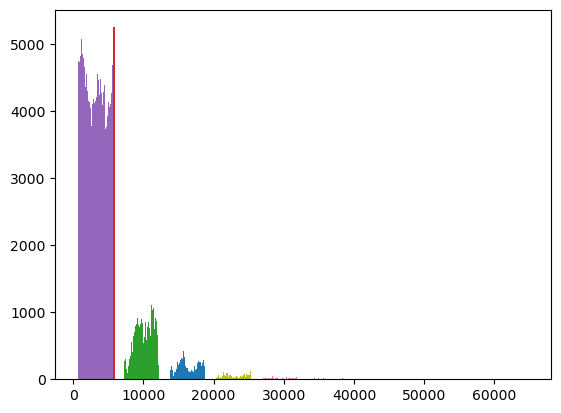

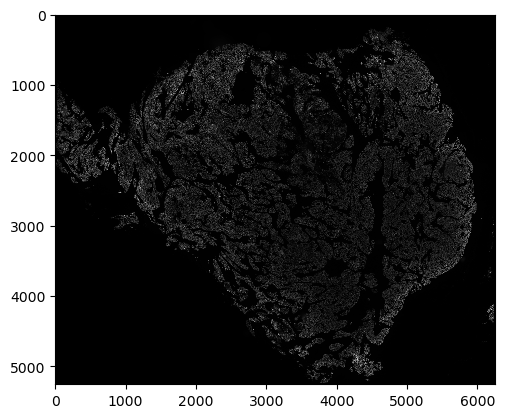

Set threshold is 12802.0
S268_iOme.ome.tiff
PanCK_2 is at 2 in file S268_iOme.ome.tiff
Shape of selected PanCK_2 image:(6331, 11844)
Minimum value is 0 at (0, 0)
Maximum value is 65535 at (441, 9427)


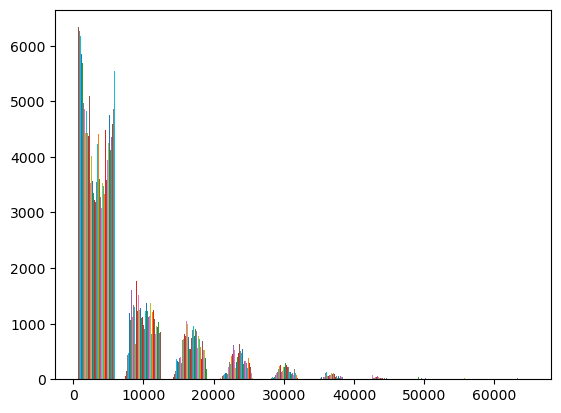

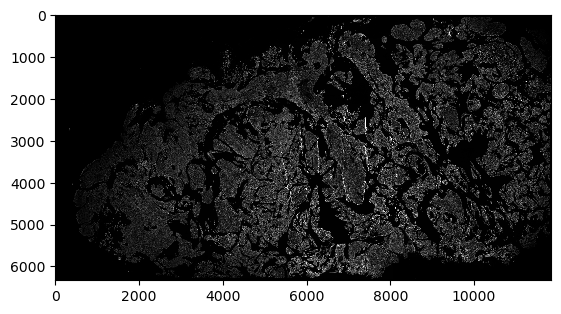

Set threshold is 21844.0
S118_iOme.ome.tiff
PanCK_2 is at 2 in file S118_iOme.ome.tiff
Shape of selected PanCK_2 image:(7894, 11863)
Minimum value is 0 at (0, 0)
Maximum value is 65535 at (681, 1565)


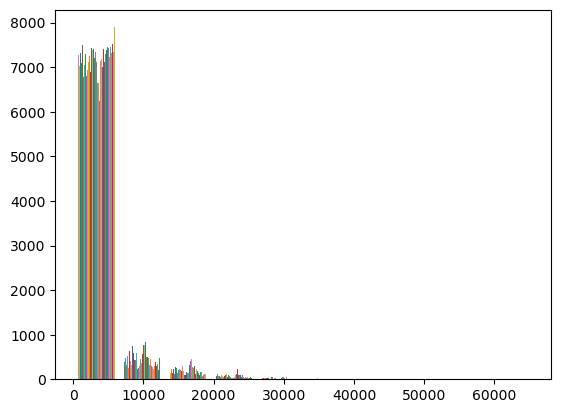

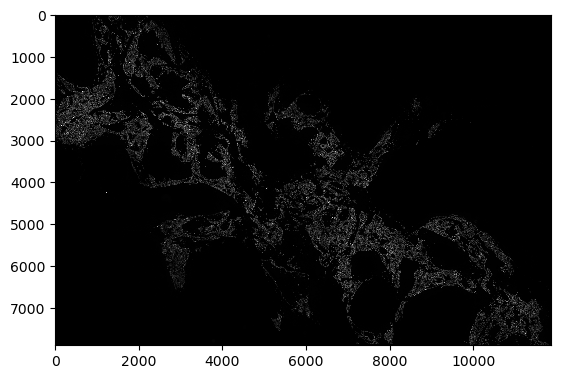

Set threshold is 10711.0
S107_iOme.ome.tiff
PanCK_2 is at 2 in file S107_iOme.ome.tiff
Shape of selected PanCK_2 image:(10005, 16213)
Minimum value is 0 at (0, 0)
Maximum value is 65535 at (1545, 12077)


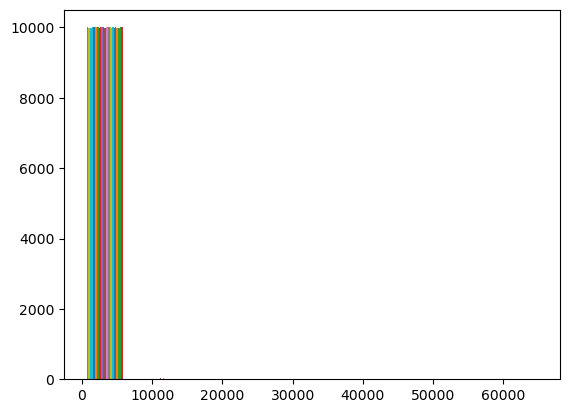

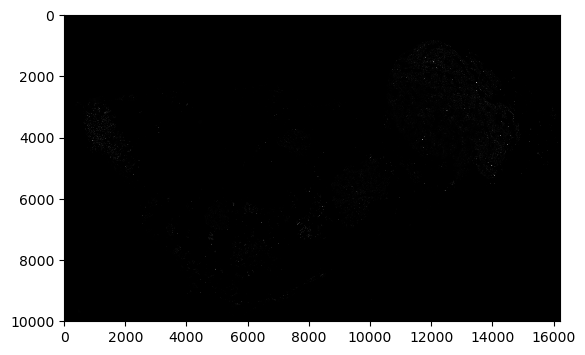

Set threshold is 582.0
S072_iOme.ome.tiff
PanCK_2 is at 2 in file S072_iOme.ome.tiff
Shape of selected PanCK_2 image:(4764, 9972)
Minimum value is 0 at (0, 0)
Maximum value is 65535 at (242, 4006)


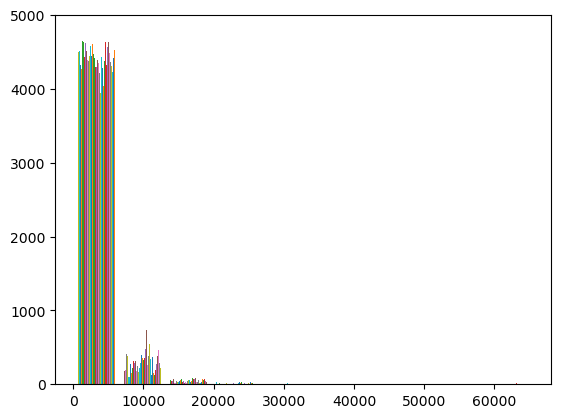

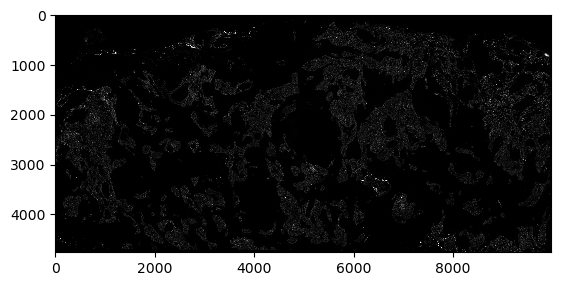

Set threshold is 8013.0
S112_iOme.ome.tiff
PanCK_2 is at 2 in file S112_iOme.ome.tiff
Shape of selected PanCK_2 image:(5235, 3153)
Minimum value is 0 at (0, 0)
Maximum value is 65535 at (1142, 1409)


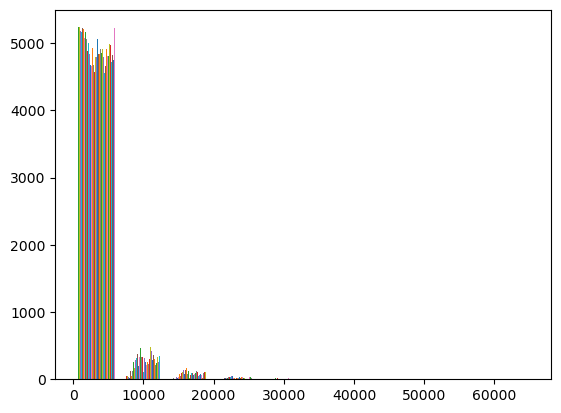

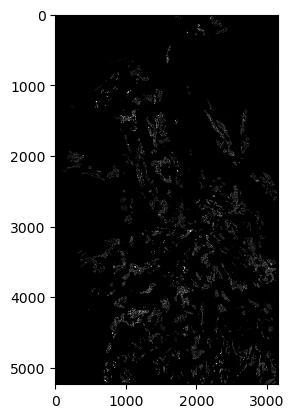

Set threshold is 7842.0
S050_iAdn.ome.tiff
PanCK_2 is at 2 in file S050_iAdn.ome.tiff
Shape of selected PanCK_2 image:(9416, 5663)
Minimum value is 0 at (0, 0)
Maximum value is 65535 at (1630, 3591)


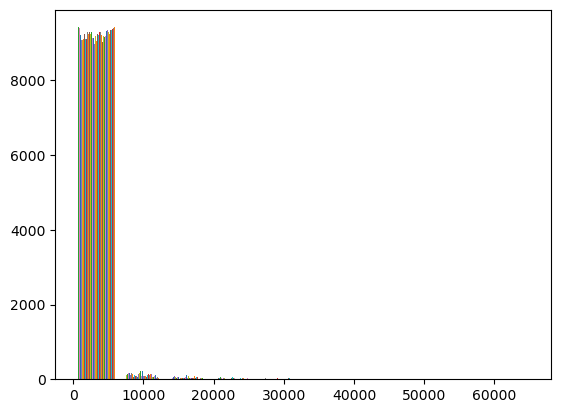

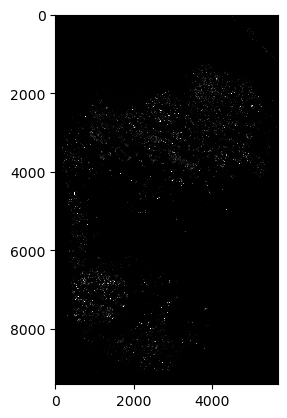

Set threshold is 1557.0
S197_iOme.ome.tiff
PanCK_2 is at 2 in file S197_iOme.ome.tiff
Shape of selected PanCK_2 image:(6831, 8126)
Minimum value is 0 at (0, 0)
Maximum value is 65535 at (2824, 4857)


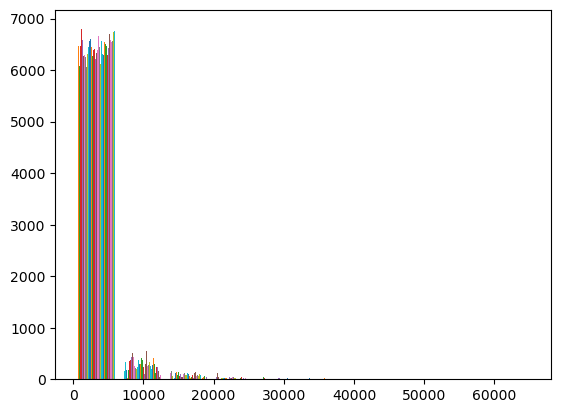

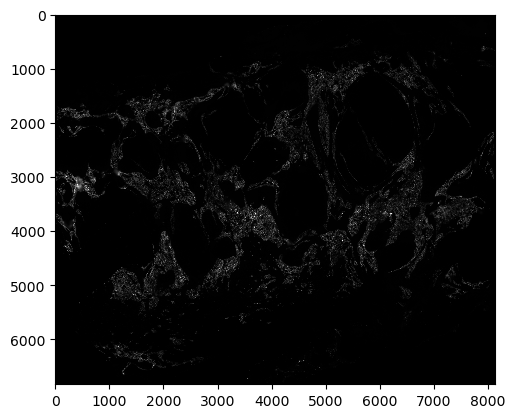

Set threshold is 7278.0
S113_iOme.ome.tiff
PanCK_2 is at 2 in file S113_iOme.ome.tiff
Shape of selected PanCK_2 image:(11525, 10647)
Minimum value is 0 at (0, 0)
Maximum value is 65535 at (2837, 2317)


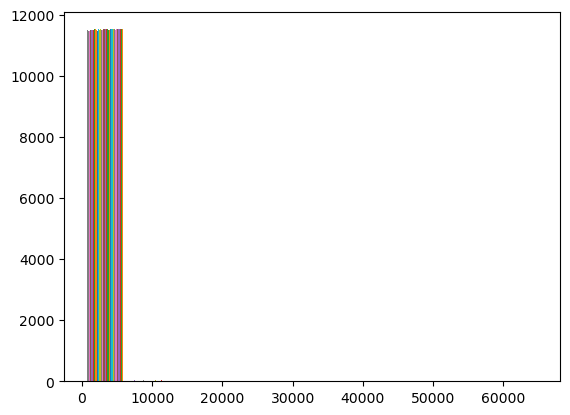

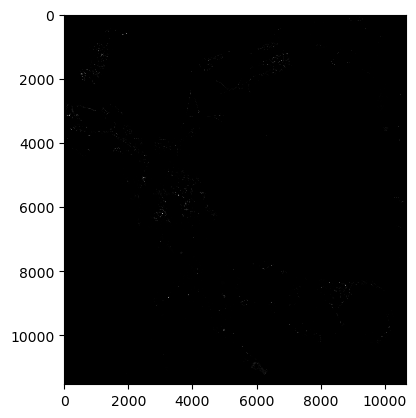

Set threshold is 205.0
S100_iOme.ome.tiff
PanCK_2 is at 2 in file S100_iOme.ome.tiff
Shape of selected PanCK_2 image:(7880, 9996)
Minimum value is 0 at (0, 0)
Maximum value is 65535 at (305, 5889)


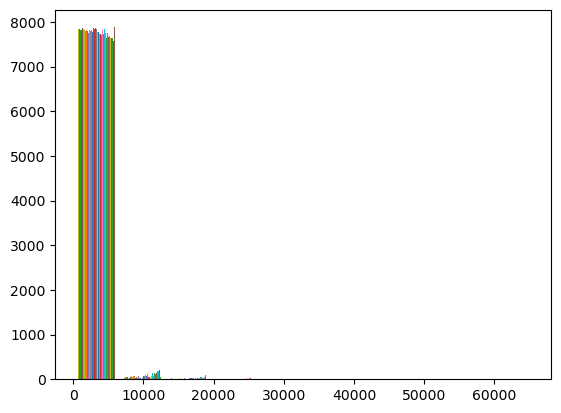

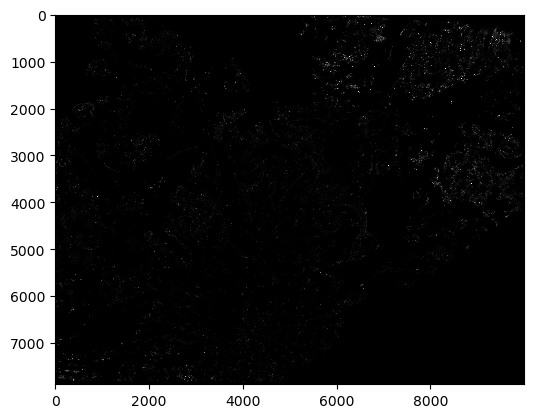

Set threshold is 2226.0
S131_iOme.ome.tiff
PanCK_2 is at 2 in file S131_iOme.ome.tiff
Shape of selected PanCK_2 image:(6848, 11224)
Minimum value is 0 at (0, 0)
Maximum value is 65535 at (211, 9139)


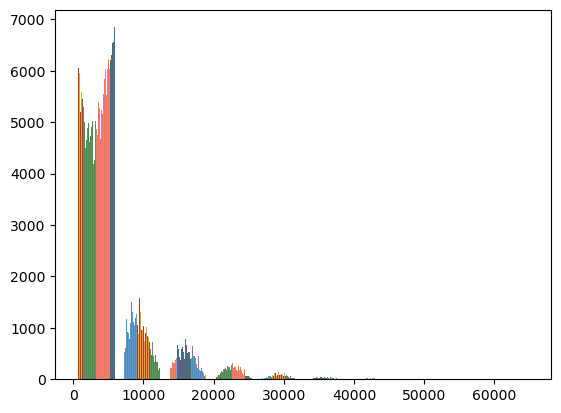

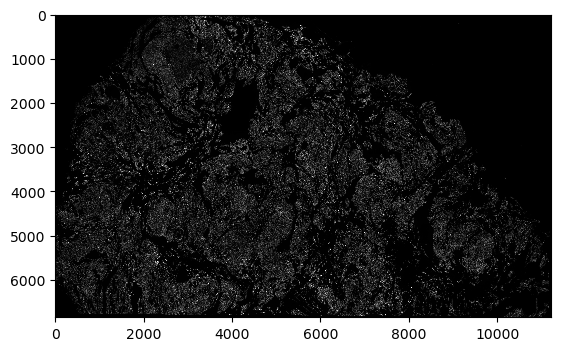

Set threshold is 17405.0
S083_iOme1.ome.tiff
PanCK_2 is at 2 in file S083_iOme1.ome.tiff
Shape of selected PanCK_2 image:(15695, 13140)
Minimum value is 0 at (0, 0)
Maximum value is 65535 at (1729, 7226)


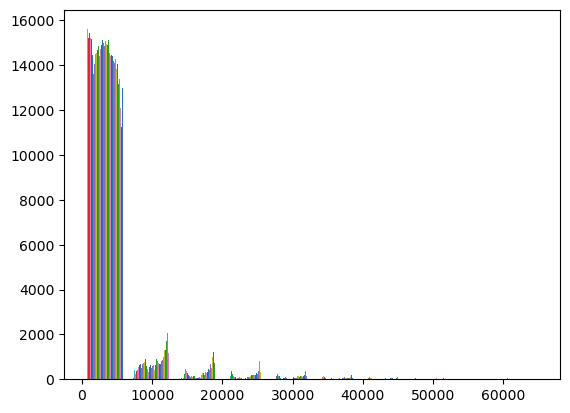

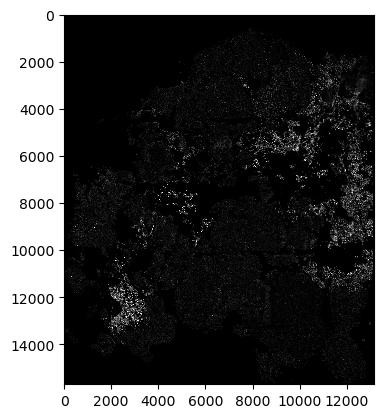

Set threshold is 9848.0
S065_iOme.ome.tiff
PanCK_2 is at 2 in file S065_iOme.ome.tiff
Shape of selected PanCK_2 image:(6836, 9362)
Minimum value is 0 at (0, 0)
Maximum value is 65535 at (151, 4649)


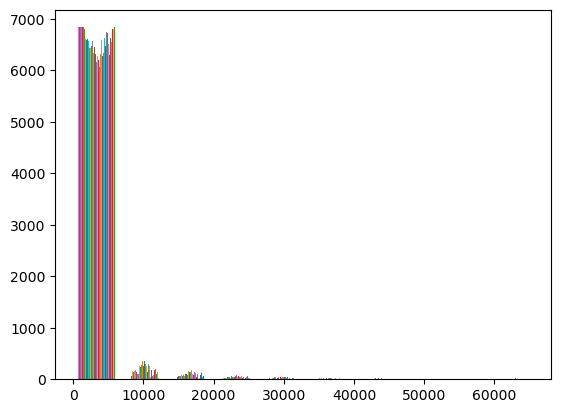

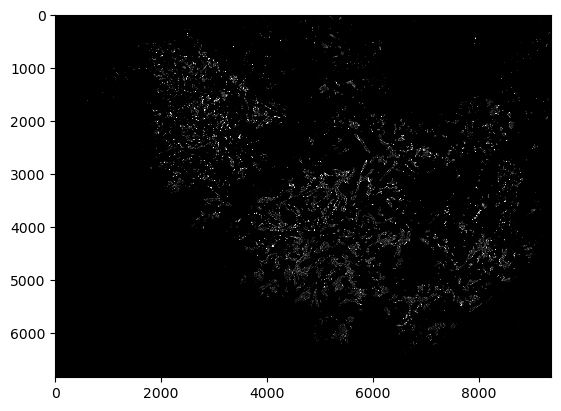

Set threshold is 5244.0
S084_iOme2.ome.tiff
PanCK_2 is at 2 in file S084_iOme2.ome.tiff
Shape of selected PanCK_2 image:(6293, 5022)
Minimum value is 0 at (0, 0)
Maximum value is 65535 at (452, 2465)


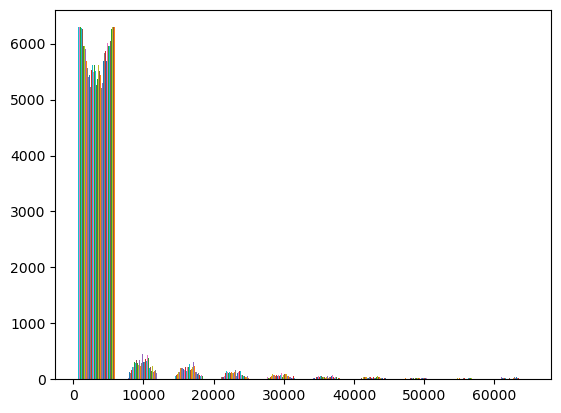

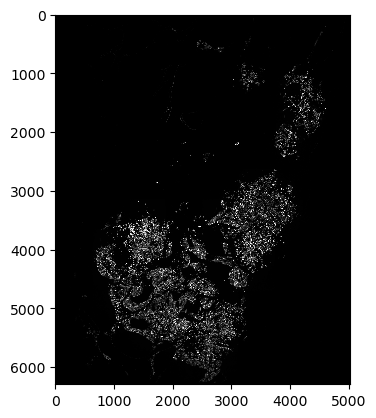

Set threshold is 13068.0
S110_iTubR.ome.tiff
PanCK_2 is at 2 in file S110_iTubR.ome.tiff
Shape of selected PanCK_2 image:(9984, 13731)
Minimum value is 0 at (0, 0)
Maximum value is 65534 at (3317, 7629)


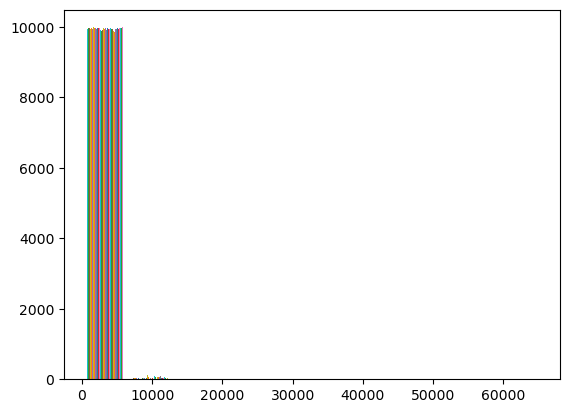

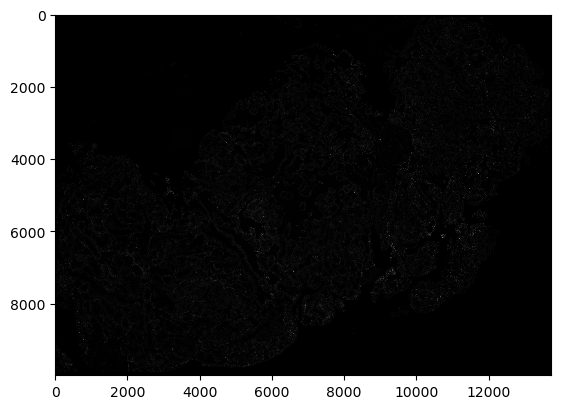

Set threshold is 2860.0
S091_iOme1.ome.tiff
PanCK_2 is at 2 in file S091_iOme1.ome.tiff
Shape of selected PanCK_2 image:(9992, 14970)
Minimum value is 0 at (0, 0)
Maximum value is 65535 at (40, 5831)


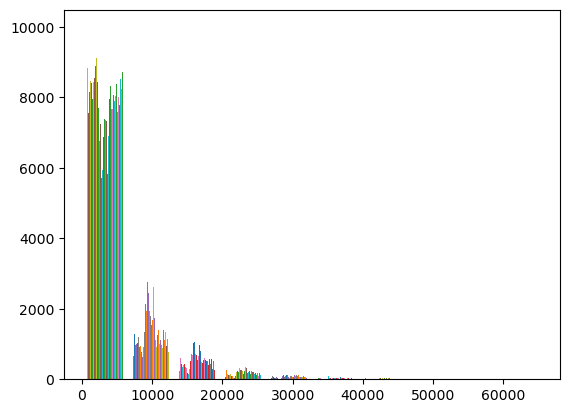

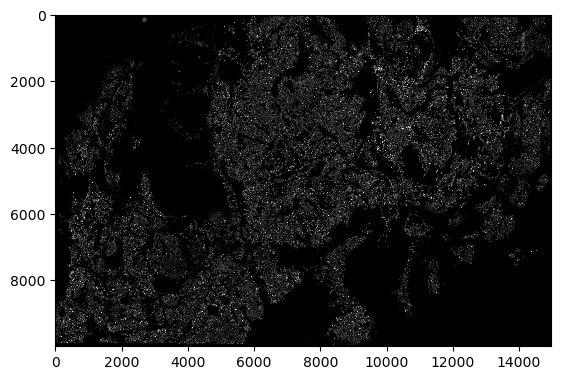

Set threshold is 16375.0
S188_iOme.ome.tiff
PanCK_2 is at 2 in file S188_iOme.ome.tiff
Shape of selected PanCK_2 image:(7914, 14957)
Minimum value is 0 at (0, 0)
Maximum value is 65535 at (1300, 6036)


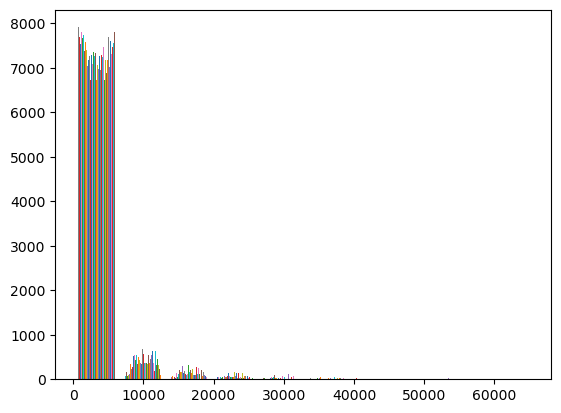

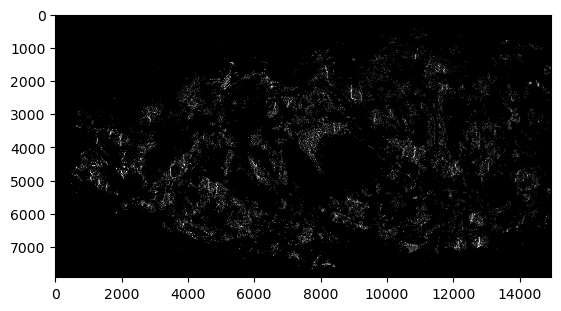

Set threshold is 9141.0
S123_iOme.ome.tiff
PanCK_2 is at 2 in file S123_iOme.ome.tiff
Shape of selected PanCK_2 image:(9459, 11861)
Minimum value is 0 at (0, 0)
Maximum value is 65535 at (710, 3341)


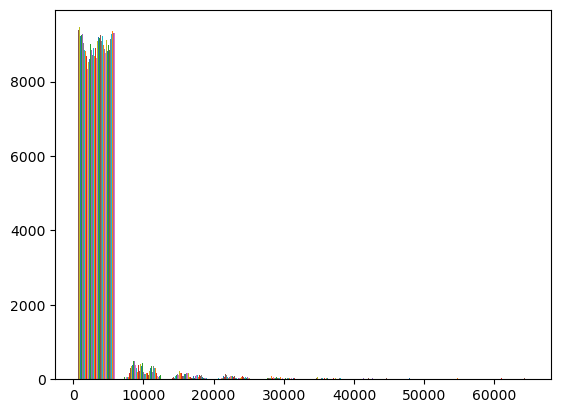

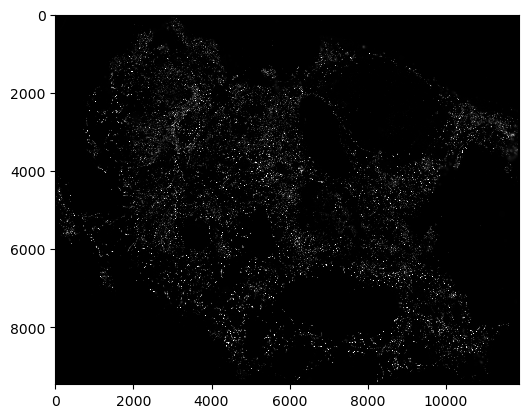

Set threshold is 6656.0
S098_iOme.ome.tiff
PanCK_2 is at 2 in file S098_iOme.ome.tiff
Shape of selected PanCK_2 image:(3693, 5625)
Minimum value is 0 at (0, 0)
Maximum value is 65535 at (611, 3435)


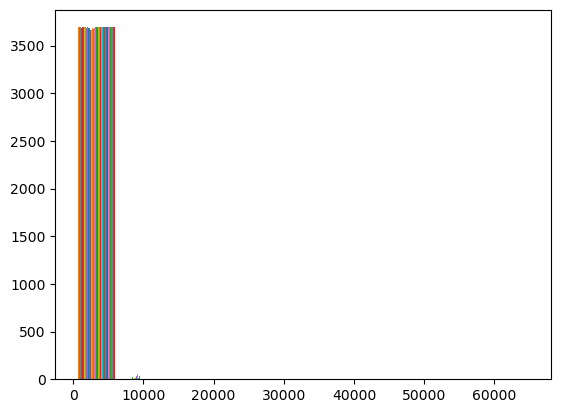

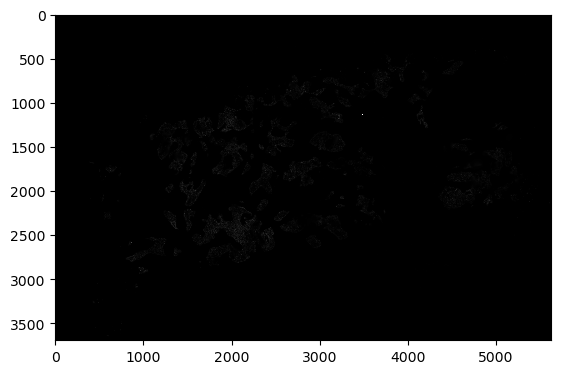

Set threshold is 1226.0
S005_iOme.ome.tiff
PanCK_2 is at 2 in file S005_iOme.ome.tiff
Shape of selected PanCK_2 image:(6308, 7507)
Minimum value is 0 at (0, 0)
Maximum value is 65535 at (1195, 6390)


In [ ]:
def create_binary_mask_for_channel(wsi_image, channel_name, channel, percentile):
    """
    Function to create binary matrix based on thresholded channel image.
    Inputs:
        - wsi_image - whole slide image 
        - channel - channel of interest
        - percentile - percentile as a threshold to create final binary image
    Output:
        - binary image
    """

    Channel_wsi_image = wsi_image[channel,:,:]
    print(f"Shape of selected {channel_name} image:{Channel_wsi_image.shape}")

    # Find the minimum value and its position
    min_value = np.min(Channel_wsi_image)
    min_position = np.unravel_index(np.argmin(Channel_wsi_image), Channel_wsi_image.shape)

    # Find the maximum value and its position
    max_value = np.max(Channel_wsi_image)
    max_position = np.unravel_index(np.argmax(Channel_wsi_image), Channel_wsi_image.shape)

    print(f"Minimum value is {min_value} at {min_position}")
    print(f"Maximum value is {max_value} at {max_position}")

    plt.hist(Channel_wsi_image)
    plt.show()
    plt.imshow(Channel_wsi_image,cmap='gray',interpolation='none')
    plt.show()

    # Calculate the threshold based on the percentile
    threshold = np.percentile(Channel_wsi_image, percentile)
    print(f"Set threshold is {threshold}")

    return(Channel_wsi_image > threshold.astype(np.uint16))

# Set working directory to the location of ROIs files
os.chdir("/scratch/project_2003009/NKI_whole_slides_validation_MHCII/")



# Get all TIFF files in the directory
tiff_files = glob.glob("*.tiff")

if not tiff_files:
    print("No TIFF files found in the directory.")

print(tiff_files)

for filename in tiff_files:

    split_string = filename.split('_')

    # Define sample and color for labels
    sample = '_'.join([split_string[0], split_string[1]])
    print(sample)

    tiff_file = [file for file in tiff_files if sample in file][0]
    
    # Open TIFF file
    with tiff.TiffFile(tiff_file, is_ome=False) as image:
        z = zarr.open(image.series[0].aszarr(), mode='r')
        wsi_image = z[2]
        
        # Get the channel index for the given marker
        channel_index = 2
        print(f"PanCK_2 is at {channel_index} in file {tiff_file}")

        # Create binary mask for PanCK
        matrix = create_binary_mask_for_channel(
            wsi_image=wsi_image, channel_name='PanCK_2', channel=channel_index, percentile=95
        )

